In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import mpl_lego as mplego

from functools import partial
from pyprojroot import here
from scipy.stats import mannwhitneyu, f_oneway
from mpl_lego.labels import bold_text, apply_subplot_labels
from mpl_lego.labels import add_significance_label

%matplotlib inline

In [2]:
mplego.style.use_latex_style()

In [5]:
df = pd.read_csv(here('data/aita_final.csv'))

In [11]:
levels = [0, 1./3, 2./3, 1]

In [12]:
nta_groups = [df[df['gpt_nta_agreement'] == prop]['comments_nta_agreement'].values
              for prop in levels]
yta_groups = [df[df['gpt_yta_agreement'] == prop]['comments_yta_agreement'].values
              for prop in levels]
nah_groups = [df[df['gpt_nah_agreement'] == prop]['comments_nah_agreement'].values
              for prop in levels]
esh_groups = [df[df['gpt_esh_agreement'] == prop]['comments_esh_agreement'].values
              for prop in levels]

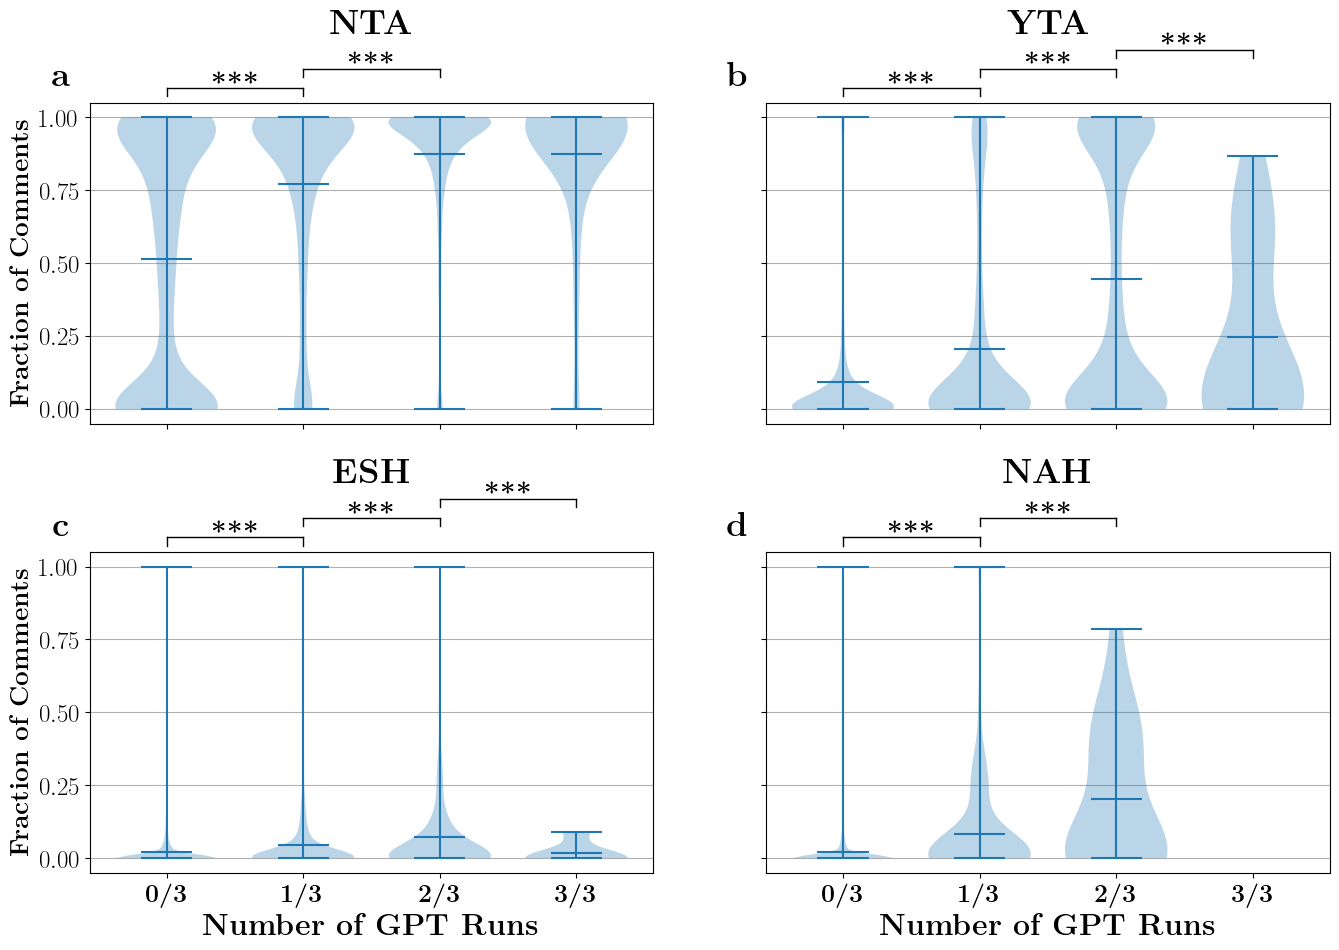

In [48]:
fig, axes = plt.subplots(2, 2,
                         figsize=(16, 10),
                         sharex=True,
                         sharey=True)
plt.subplots_adjust(hspace=0.4)

for ax, group in zip(axes.ravel(), [nta_groups,
                                    yta_groups,
                                    esh_groups,
                                    nah_groups]):
    if len(group[-1]) == 0:  
        ax.violinplot(showmeans=True,
                      widths=0.25,
                      dataset=group[:3],
                      positions=levels[:3])
    else:
        ax.violinplot(showmeans=True,
              widths=0.25,
              dataset=group,
              positions=levels)
    ax.set_xticks(levels)
    ax.set_xticklabels(bold_text(['0/3', '1/3', '2/3', '3/3']))
    ax.set_yticks([0, 0.25, 0.50, 0.75, 1.0])
    ax.tick_params(labelsize=18)
    ax.grid(axis='y')
    ax.set_axisbelow(True)

axes[1, 0].set_xlabel(bold_text('Number of GPT Runs'), fontsize=22)
axes[1, 0].set_ylabel(bold_text('Fraction of Comments'), fontsize=19)
axes[1, 1].set_xlabel(bold_text('Number of GPT Runs'), fontsize=22)
axes[0, 0].set_ylabel(bold_text('Fraction of Comments'), fontsize=19)

add_significance_label(axes[0, 0],
                       bounds=[0, 1./3,],
                       label=bold_text('***'),
                       spacing=0.02,
                       width=0.025)
add_significance_label(axes[0, 0],
                       bounds=[1./3, 2./3,],
                       label=bold_text('***'),
                       spacing=0.08,
                       width=0.025)

add_significance_label(axes[0, 1],
                       bounds=[0, 1./3,],
                       label=bold_text('***'),
                       spacing=0.02,
                       width=0.025)
add_significance_label(axes[0, 1],
                       bounds=[1./3, 2./3,],
                       label=bold_text('***'),
                       spacing=0.08,
                       width=0.025)
add_significance_label(axes[0, 1],
                       bounds=[2./3, 3./3,],
                       label=bold_text('***'),
                       spacing=0.14,
                       width=0.025)

add_significance_label(axes[1, 0],
                       bounds=[0, 1./3,],
                       label=bold_text('***'),
                       spacing=0.02,
                       width=0.025)
add_significance_label(axes[1, 0],
                       bounds=[1./3, 2./3,],
                       label=bold_text('***'),
                       spacing=0.08,
                       width=0.025)
add_significance_label(axes[1, 0],
                       bounds=[2./3, 3./3,],
                       label=bold_text('***'),
                       spacing=0.14,
                       width=0.025)


add_significance_label(axes[1, 1],
                       bounds=[0, 1./3,],
                       label=bold_text('***'),
                       spacing=0.02,
                       width=0.025)
add_significance_label(axes[1, 1],
                       bounds=[1./3, 2./3,],
                       label=bold_text('***'),
                       spacing=0.08,
                       width=0.025)


axes[0, 0].set_title(bold_text('NTA'), fontsize=25, pad=50)
axes[0, 1].set_title(bold_text('YTA'), fontsize=25, pad=50)
axes[1, 0].set_title(bold_text('ESH'), fontsize=25, pad=50)
axes[1, 1].set_title(bold_text('NAH'), fontsize=25, pad=50)

apply_subplot_labels(axes, bold=True, size=25, x=-0.05, y=1.08)

plt.savefig('figure2.pdf', bbox_inches='tight')

In [20]:
len(nah_groups)

4